https://www.kaggle.com/kernels/scriptcontent/5643287/

# Feature selection - Correlation and P value
Often when we get a dataset, we might find a plethora of features in the dataset. All of the features we find in the dataset might not be useful in building a machine learning model to make the necessary prediction. Using some of the features might even make the predictions worse. So, feature selection plays a huge role in building a machine learning model.

In this kernel we will explore two measures that we can use on the data to select the right features.

## Contents
1. [Correlation](#1)
    1. [What is Correlation?](#1-1)
    2. [How does correlation help in feature selection?](#1-2)
2. [P-value](#2)
    1. [What is p-value?](#2-1)
    2. [How does p-value help in feature selection?](#2-2)
3. [Implementation](#3)
    1. [The dataset](#3-1)
    2. [Selecting feaatures based on correlation](#3-2)
    3. [Selecting features based on p-value](#3-3)
    4. [Visualizing the selected features](#3-4)
    5. [Building  model with the selected features](#3-5)
    6. [Building model without feature selection and comparing the results](#3-6)

<a id="1"></a> 
## Correlation
<a id="1-1"></a>
### What is correlation?
Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

For example, two variables which are linearly dependent (say, **x** and **y** which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2)
<a id="1-2"></a>
### How does correlation help in feature selection?
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

<a id="2"></a>
## P-value
Before we try to understand about about p-value, we need to know about the null hypothesis.

**Null hypothesis** is a general statement that there is no relationship between two measured phenomena. 
>Testing (accepting, approving, rejecting, or disproving) the null hypothesis—and thus concluding that there are or are not grounds for believing that there is a relationship between two phenomena (e.g. that a potential treatment has a measurable effect)—is a central task in the modern practice of science; the field of statistics gives precise criteria for rejecting a null hypothesis.

*Source: [Wikipedia](https://en.wikipedia.org/wiki/Null_hypothesis)*

For more info about the null hypothesis check the above Wikipedia article


<a id="2-1"></a>
### What is p-value?
P-value or probability value or asymptotic significance is a probability value  for a given statistical model that, if the null hyothesis is true, a set of statistical observations more commonly known as the [statistical summary](https://en.wikipedia.org/wiki/Summary_statistics) is greater than or equal in magnitude to the observed results. 
<a id="2-2"></a>
### How does p-value help in feature selection?
Removal of different features from the dataset will have different effects on the p-value for the dataset. We can remove different features and measure the p-value in each case. These measured p-values can be used to decide whether to keep a feature or not.

<a id="3"></a>
## Implementation

### Import the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC

np.random.seed(123)
warnings.filterwarnings("ignore")

The `numpy.random.seed()` makes the random numbers predictable and is used for reproducibility

<a id="3-1"></a>
## The Dataset
The dataset used here is the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

This dataset contains 569 records of and 32 features (including the Id ). The features represent various parameter that **might** be useful in predicting if a tumor is malignant or benign.

### Loading the dataset

In [2]:
data = pd.read_csv('../data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Removing the Id and the Unnamed columns

In [4]:
data = data.iloc[:,1:-1]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Next, we encode the [Categorical Variable](https://en.wikipedia.org/wiki/Categorical_variable)

In [5]:
data.iloc[:,0].head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [6]:
label_encoder = LabelEncoder()

data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null float64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 

<a id="3-2"></a>
## Selecting features based on correlation
Generating the correlation matrix

In [8]:
corr = data.corr()
corr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


Generating the correlation heatmap

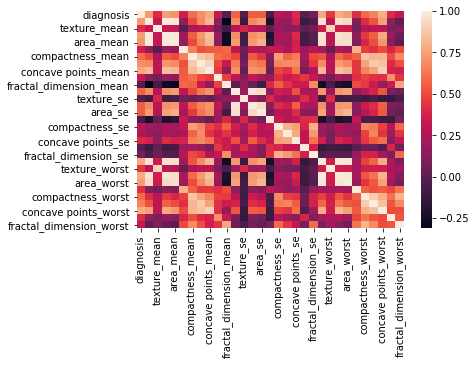

In [9]:
sns.heatmap(corr)
plt.show()

Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [10]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
columns

array([ True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False,  True,  True])

In [11]:
selected_columns = data.columns[columns]
selected_columns.shape

(21,)

In [12]:
print(selected_columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Above, we can see that only 21 columns were selected.

In [13]:
data = data[selected_columns]
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1.0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1.0,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1.0,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1.0,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


Now, the dataset has only those columns with correlation less than 0.9

<a id="3-3"></a>
## Selecting columns based on p-value
Next we will be selecting the columns based on how they affect the p-value. We are the removing the column `diagnosis` because it is the column we are trying to predict

In [14]:
# Removing the dignosis column
selected_columns = selected_columns[1:].values
selected_columns

array(['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

https://stackoverflow.com/questions/56449787/attributeerror-module-statsmodels-formula-api-has-no-attribute-ols

In [15]:
# import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [16]:
SL = 0.05

data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, 
                                                     data.iloc[:,0].values, 
                                                     SL, 
                                                     selected_columns)

Moving the result to a new dataframe

In [17]:
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]
result.shape

(569, 1)

Creating a dataframe with the columns selected using the p-value and correlation

In [18]:
data = pd.DataFrame(data=data_modeled, columns=selected_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
concavity_mean             569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
fractal_dimension_se       569 non-null float64
smoothness_worst           569 non-null float64
concavity_worst            569 non-null float64
symmetry_worst             569 non-null float64
fractal_dimension_worst    569 non-null float64
dtypes: float64(13)
memory usage: 57.9 KB


In [19]:
data.head()

,radius_mean,texture_mean,concavity_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.3001,0.07871,1.0950,0.04904,0.05373,0.01587,0.006193,0.1622,0.7119,0.4601,0.11890
1,20.57,17.77,0.0869,0.05667,0.5435,0.01308,0.01860,0.01340,0.003532,0.1238,0.2416,0.2750,0.08902
2,19.69,21.25,0.1974,0.05999,0.7456,0.04006,0.03832,0.02058,0.004571,0.1444,0.4504,0.3613,0.08758
3,11.42,20.38,0.2414,0.09744,0.4956,0.07458,0.05661,0.01867,0.009208,0.2098,0.6869,0.6638,0.17300
4,20.29,14.34,0.1980,0.05883,0.7572,0.02461,0.05688,0.01885,0.005115,0.1374,0.4000,0.2364,0.07678


<a id="3-4"></a>
## Visualizing the selected features
Plotting the data to visualize their distribution

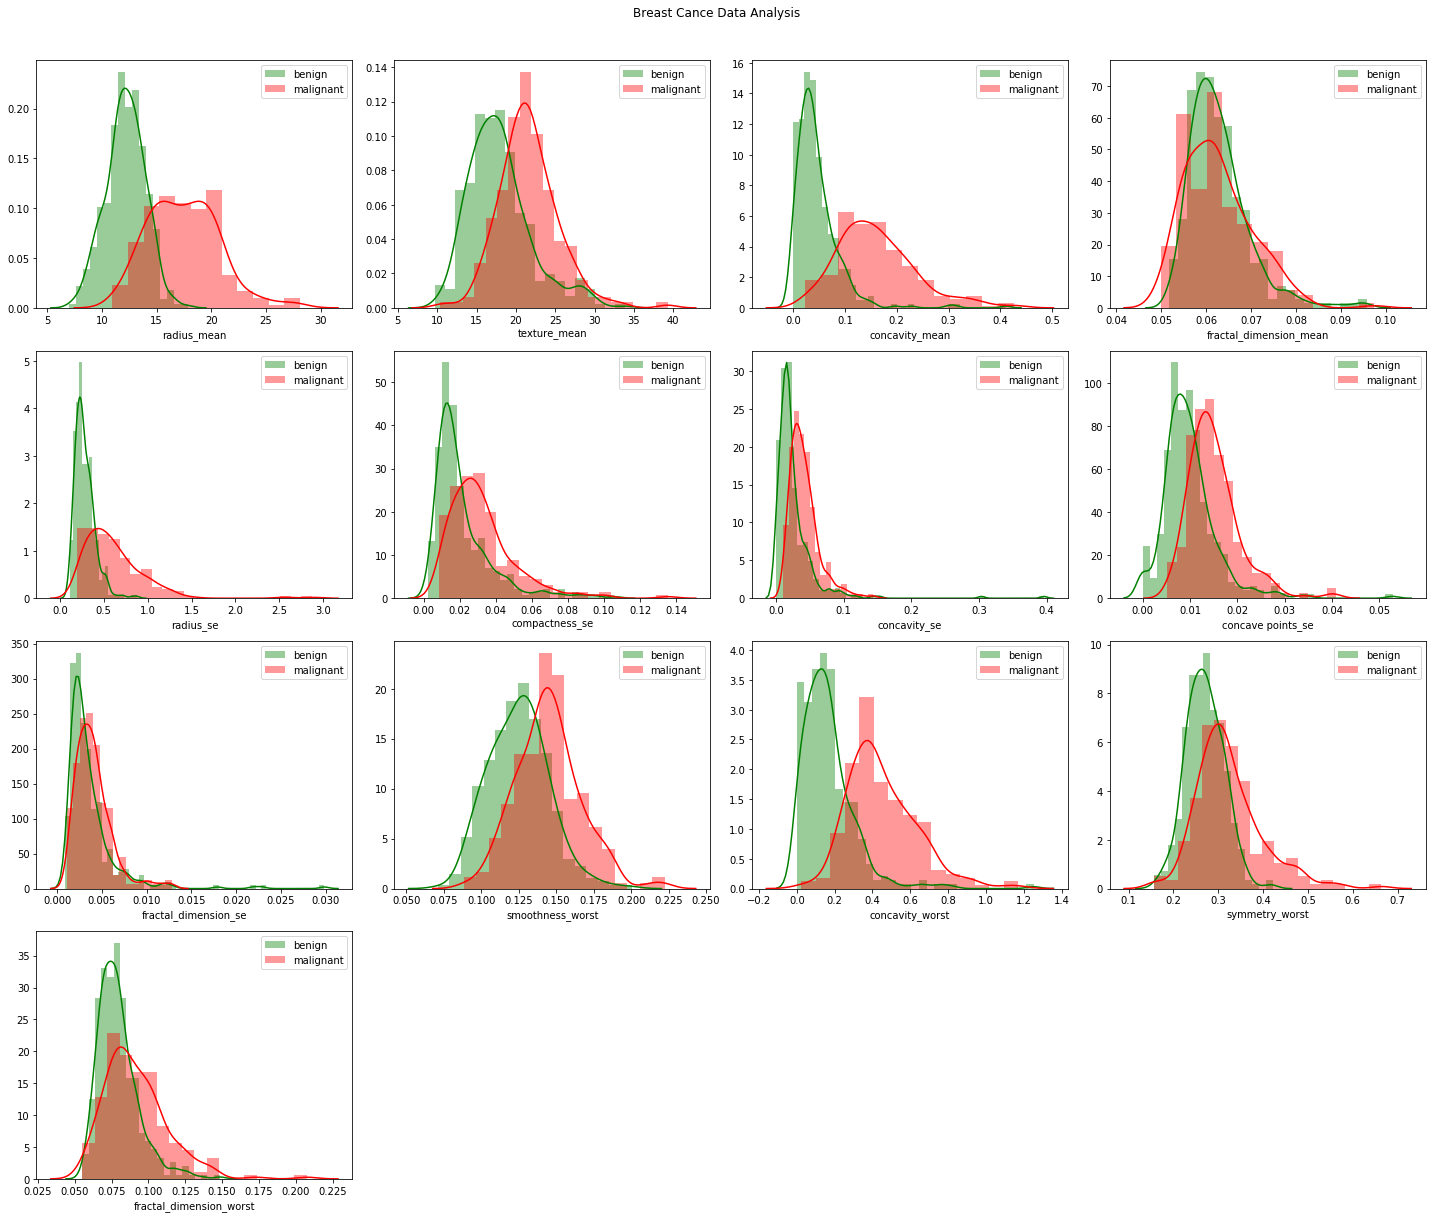

In [20]:
fig = plt.figure(figsize = (20, 25))

j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')

fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Now we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 13), (114, 13), (455, 1), (114, 1))

<a id="3-5"></a>
## Building a model with the selected features
We are using a [Support Vector Classifier](https://en.wikipedia.org/wiki/Support_vector_machine) with a [Gaussian Kernel](https://en.wikipedia.org/wiki/Gaussian_function) to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [22]:
# The default kernel used by SVC is the gaussian kernel
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Making the predictions and calculating the accuracy

In [23]:
prediction = svc.predict(x_test)
prediction

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

We are using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) here

In [24]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.9298245614035088


<a id="3-6"></a>
## Building a model without feature selection and comparing the results
Next, we repeat all the above steps except feature selection, which are:
* Loading the data
* Removing the unwanted columns
* Encoding the categorical variable
* Splitting the data into train and test set
* Fitting the data to the model
* Making the predictions and calculating the accuracy

In [25]:
data = pd.read_csv('../data.csv')  

result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,1]

data = data.iloc[:,2:-1]                         
label_encoder = LabelEncoder()              
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')    

x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)      

svc = SVC()
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 

cm = confusion_matrix(y_test, prediction)        
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

0.7017543859649122


Here we can see that the accuracy of the predictions is better when proper feature selection is performed